In [151]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import datestr2num

import glob

In [2]:
path_list = glob.glob('*.npy')

list_keys = {'L(km)': [80,300],
             '$\\theta$': [-10,10],
             'vr(pu)': [0.95,1.05],
             'sn(pu)': [0.1,4],
             'Loss': [0,1],
            }
list_dt = []

for path in path_list:
    data = np.load(path, allow_pickle = True)
    print([path,data.shape[0]])
    dt = pd.DataFrame(data = data,
                     columns = list(list_keys.keys()),
                     )
    list_dt.append(dt)

['Line1.npy', 2023615]
['Line2.npy', 2058967]
['Line3.npy', 2019999]
['Line4.npy', 2019999]


In [314]:
list_dt[2].head(50)

,L(km),$\theta$,vr(pu),sn(pu),Loss
0,80.000000,12.551020,0.95,0.179592,0.999771
1,80.000000,13.163265,0.95,0.179592,0.999772
2,84.489796,13.163265,0.95,0.179592,0.999758
3,80.000000,13.775510,0.95,0.179592,0.999772
4,84.489796,13.775510,0.95,0.179592,0.999758
5,88.979592,13.775510,0.95,0.179592,0.999744
6,80.000000,14.387755,0.95,0.179592,0.999772
7,84.489796,14.387755,0.95,0.179592,0.999758
8,88.979592,14.387755,0.95,0.179592,0.999744
9,80.000000,15.000000,0.95,0.179592,0.999772


Text(0.9990522910919182, 35000.0, '$\\bar{x}\\approx$0.998')

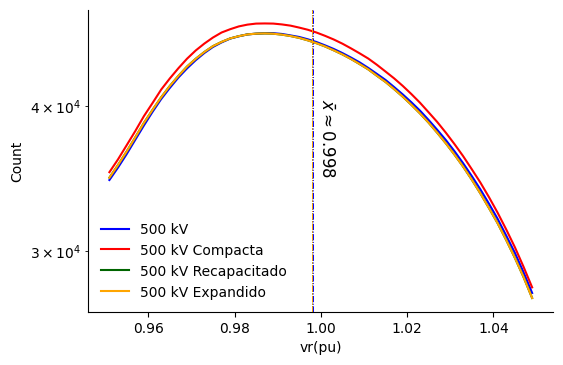

In [316]:
list_name = ['500 kV', '500 kV Compacta', '500 kV Recapacitado', '500 kV Expandido']

dpi = 100
fig, ax = plt.subplots(dpi = dpi)
al = 1
log_scale = (False, True)
stat1 = 'count'
element = 'poly'
fill = False
color = ['blue','red', 'darkgreen', 'orange',]

for idx in range(4):
    sb.histplot(list_dt[idx], x="vr(pu)", bins = 50, ax = ax, fill = fill, stat = stat1, element = element, alpha = al, color = color[idx], log_scale = log_scale, label = list_name[idx]) 
    sb.despine()
    plt.legend(frameon = False)
    ax.axvline(list_dt[idx]["vr(pu)"].mean(), ls = '-.', color = color[idx], alpha = 1, lw = .7)

ax.text(dt['vr(pu)'].mean()+0.001, 35e3, '$\\bar{x}\\approx$%.3f'%(dt['vr(pu)'].mean()),color = 'k', rotation = -90, size = 'large')


Text(1.1097695233501426, 10000.0, '$\\bar{x}\\approx$1.11')

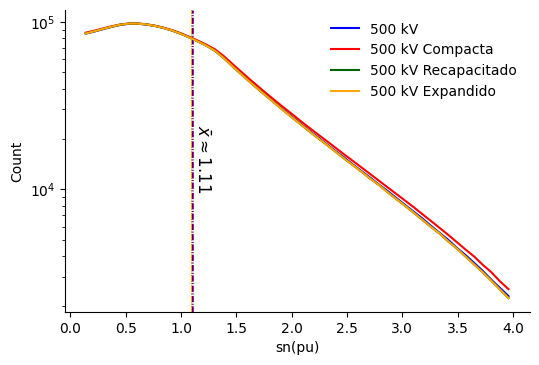

In [317]:
fig, ax = plt.subplots(dpi = dpi)

for idx in range(4):
    sb.histplot(list_dt[idx], x="sn(pu)", bins = 50, ax = ax, fill = fill, stat = stat1, element = element, alpha = al, color = color[idx], log_scale = log_scale, label = list_name[idx]) 
    sb.despine()
    plt.legend(frameon = False)
    ax.axvline(list_dt[idx]["sn(pu)"].mean(), ls = '-.', color = color[idx], alpha = 1, lw = .7)

ax.text(dt['sn(pu)'].mean()+0.001, 10e3, '$\\bar{x}\\approx$%.2f'%(dt['sn(pu)'].mean()),color = 'k', rotation = -90, size = 'large')



Text(-2.1620790922767354, 30000.0, '$\\bar{x}\\approx$-2.2°')

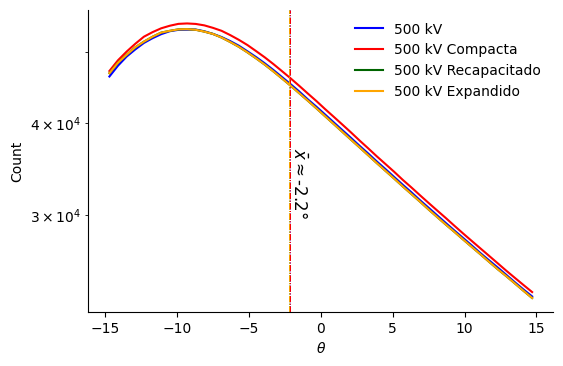

In [318]:
fig, ax = plt.subplots(dpi = dpi)

for idx in range(4):
    sb.histplot(list_dt[idx], x="$\\theta$", bins = 50, ax = ax, fill = fill, stat = stat1, element = element, alpha = al, color = color[idx], log_scale = log_scale, label = list_name[idx]) 
    sb.despine()
    plt.legend(frameon = False)
    ax.axvline(list_dt[idx]["$\\theta$"].mean(), ls = '-.', color = color[idx], alpha = 1, lw = .7)

ax.text(dt['$\\theta$'].mean()+0.001, 30e3, '$\\bar{x}\\approx$%.1f°'%(dt['$\\theta$'].mean()),color = 'k', rotation = -90, size = 'large')



Text(164.73098670236692, 20000.0, '$\\bar{x}\\approx$164.7 km')

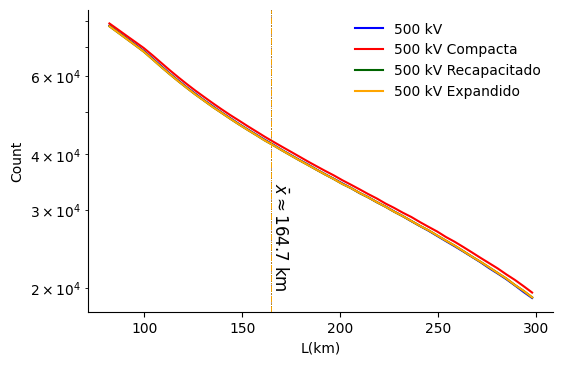

In [319]:
fig, ax = plt.subplots(dpi = dpi)

for idx in range(4):
    sb.histplot(list_dt[idx], x='L(km)', bins = 50, ax = ax, fill = fill, stat = stat1, element = element, alpha = al, color = color[idx], log_scale = log_scale, label = list_name[idx]) 
    sb.despine()
    plt.legend(frameon = False)
    ax.axvline(list_dt[idx]['L(km)'].mean(), ls = '-.', color = color[idx], alpha = 1, lw = .7)

ax.text(dt['L(km)'].mean()+0.001, 20e3, '$\\bar{x}\\approx$%.1f km'%(dt['L(km)'].mean()),color = 'k', rotation = -90, size = 'large')


Text(0.9808305988066973, 1000.0, '$\\bar{x}\\approx$0.98')

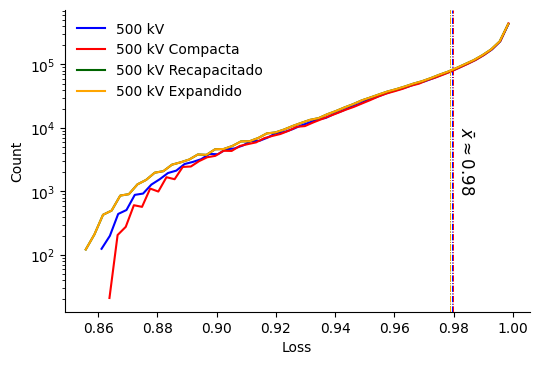

In [320]:
fig, ax = plt.subplots(dpi = dpi)

for idx in range(4):
    sb.histplot(list_dt[idx], x='Loss', bins = 50, ax = ax, fill = fill, stat = stat1, element = element, alpha = al, color = color[idx], log_scale = log_scale, label = list_name[idx]) 
    sb.despine()
    plt.legend(frameon = False)
    ax.axvline(list_dt[idx]['Loss'].mean(), ls = '-.', color = color[idx], alpha = 1, lw = .7)

ax.text(dt['Loss'].mean()+0.001, 1e3, '$\\bar{x}\\approx$%.2f'%(dt['Loss'].mean()),color = 'k', rotation = -90, size = 'large')



In [566]:
idx = 0
dt = list_dt[idx]

key = '$\\theta$'

mean = dt[key].mean()
std = dt[key].std()
k = 1

dt1 = dt.loc[(dt[key] >= dt[key].min()) & (dt[key] < mean - k*std)]
dt2 = dt.loc[(dt[key] >= mean - k*std) & (dt[key] < mean + k*std)]
dt3 = dt.loc[(dt[key] >= mean + k*std) & (dt[key] <= dt[key].max())]

dt2.max()

L(km)       300.000000
$\theta$      5.816327
vr(pu)        1.050000
sn(pu)        4.000000
Loss          0.999916
dtype: float64

[0.9980995129599101, 0.027884512990827417]
[1.0084074712441802, 0.02584729305086543]


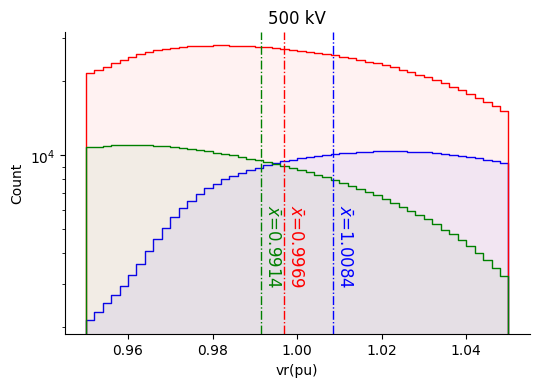

In [572]:
## Vr
color = ['blue', 'red', 'green']
bins = [50, 50, 50]

fig, ax = plt.subplots(dpi = dpi)
al = .05
log_scale = (False, True)
stat1 = 'count'
element = 'step'
fill = True

for aux, dts in enumerate([dt1, dt2, dt3]):
    sb.histplot(dts, x="vr(pu)",bins = bins[aux], ax = ax, stat = stat1, fill = fill, element = element, alpha = al, color = color[aux], log_scale = log_scale)
    ax.axvline(x = dts['vr(pu)'].mean(), color = color[aux], linestyle = '-.', alpha = 1, linewidth = 1)
    ax.text(dts['vr(pu)'].mean()+0.0005, 0.3e4, '$\\bar{x}$=%.4f'%(dts['vr(pu)'].mean()),color = color[aux], rotation = -90, size = 'large')

'''sb.histplot(list_dt[0], x="vr(pu)",bins = 50, ax = ax, stat = stat1, fill = fill, element = element, alpha = al, color = 'blue', log_scale = log_scale)
sb.histplot(dt1, x="vr(pu)", bins = 15, ax = ax, stat = stat1, element = element, fill = fill, alpha = al, color = 'red', log_scale = log_scale)

ax.axvline(x = dt['vr(pu)'].mean(), color = 'b', linestyle = '-.', alpha = 1, linewidth = 1)
ax.axvline(x = dt1['vr(pu)'].mean(), color = 'r', linestyle = '-.', alpha = 1, linewidth = 1)
ax.text(dt['vr(pu)'].mean()+0.001, 3, '$\\bar{x}$=%.4f'%(dt['vr(pu)'].mean()),color = 'b', rotation = -90, size = 'large')
ax.text(dt1['vr(pu)'].mean()+0.001, 3, '$\\bar{x}$=%.4f'%(dt1['vr(pu)'].mean()),color = 'r', rotation = -90, size = 'large')
'''
sb.despine()
plt.title(list_name[idx])
stat1 = 'percent'

print([dt['vr(pu)'].mean(),dt['vr(pu)'].std()])
print([dt1['vr(pu)'].mean(),dt1['vr(pu)'].std()])

[-2.151812625485802, 8.3717799153141]
[-12.793168249553965, 1.396282157663128]


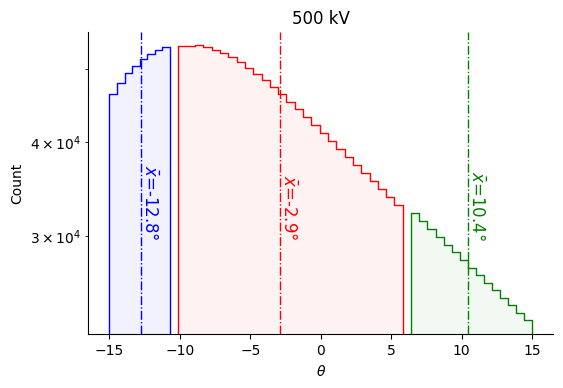

In [575]:
## Theta

bins = [8, 27, 15]

fig, ax = plt.subplots(dpi = dpi)
#al = .2
log_scale2 = log_scale
stat2 = 'count'

for aux, dts in enumerate([dt1, dt2, dt3]):
    sb.histplot(dts, x="$\\theta$",bins = bins[aux], ax = ax, stat = stat2, fill = fill, element = element, alpha = al, color = color[aux], log_scale = log_scale)
    ax.axvline(x = dts['$\\theta$'].mean(), color = color[aux], linestyle = '-.', alpha = 1, linewidth = 1)
    ax.text(dts['$\\theta$'].mean()+0.001, 3e4, '$\\bar{x}$=%.1f°'%(dts['$\\theta$'].mean()),color = color[aux], rotation = -90, size = 'large')
    
'''
sb.histplot(list_dt[0], x="$\\theta$", bins = 50, ax = ax, stat = stat2, fill = fill, element = element, alpha = al, color = 'blue', log_scale = log_scale2)
sb.histplot(dt1, x="$\\theta$", bins = 50, ax = ax, element = element, fill = fill,  stat = stat2, alpha = al, color = 'red', log_scale = log_scale2)

ax.axvline(x = dt['$\\theta$'].mean(), color = 'b', linestyle = '-.', alpha = 1, linewidth = 1)
ax.axvline(x = dt1['$\\theta$'].mean(), color = 'r', linestyle = '-.', alpha = 1, linewidth = 1)
ax.text(dt['$\\theta$'].mean()+0.001, 3, '$\\bar{x}$ = %.1f°'%(dt['$\\theta$'].mean()),color = 'b', rotation = -90, size = 'large')
ax.text(dt1['$\\theta$'].mean()+0.001,5, '$\\bar{x}$ = %.1f°'%(dt1['$\\theta$'].mean()),color = 'r', rotation = -90, size = 'large')
'''

sb.despine()
plt.title(list_name[idx])

print([dt['$\\theta$'].mean(),dt['$\\theta$'].std()])
print([dt1['$\\theta$'].mean(),dt1['$\\theta$'].std()])

[1.096734799770082, 0.7822837839467767]
[1.492804393405532, 0.9287128401093838]


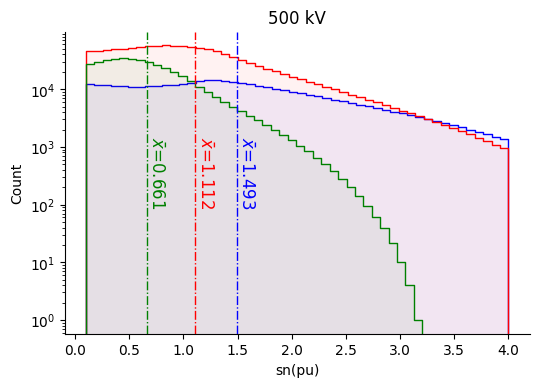

In [577]:
## Sn
bins = [50, 50, 40]

fig, ax = plt.subplots(dpi = dpi)
#al = .2
log_scale3 = log_scale2
stat3 = stat1


for aux, dts in enumerate([dt1, dt2, dt3]):
    sb.histplot(dts, x="sn(pu)",bins = bins[aux], ax = ax, stat = stat2, fill = fill, element = element, alpha = al, color = color[aux], log_scale = log_scale)
    ax.axvline(x = dts['sn(pu)'].mean(), color = color[aux], linestyle = '-.', alpha = 1, linewidth = 1)
    ax.text(dts['sn(pu)'].mean()+0.001, 1e2, '$\\bar{x}$=%.3f'%(dts['sn(pu)'].mean()),color = color[aux], rotation = -90, size = 'large')

'''
sb.histplot(list_dt[0], x="sn(pu)", bins = 50, ax = ax, element = element, fill = fill, stat = stat3, alpha = al, color = 'blue', log_scale = log_scale3)
sb.histplot(dt1, x="sn(pu)", bins = 15, ax = ax, element = element, fill = fill, stat = stat3, alpha = al, color = 'red', log_scale = log_scale3)

ax.axvline(x = dt['sn(pu)'].mean(), color = 'b', linestyle = '-.', alpha = 1, linewidth = 1)
ax.axvline(x = dt1['sn(pu)'].mean(), color = 'r', linestyle = '-.', alpha = 1, linewidth = 1)
ax.text(dt['sn(pu)'].mean()+0.001, 3, '$\\bar{x}$=%.4f'%(dt['sn(pu)'].mean()),color = 'b', rotation = -90, size = 'large')
ax.text(dt1['sn(pu)'].mean()+0.001,5, '$\\bar{x}$=%.4f'%(dt1['sn(pu)'].mean()),color = 'r', rotation = -90, size = 'large')
'''
sb.despine()
plt.title(list_name[idx])

print([dt['sn(pu)'].mean(),dt['sn(pu)'].std()])
print([dt1['sn(pu)'].mean(),dt1['sn(pu)'].std()])

[164.52698355998285, 62.439719733631684]
[153.09714983387855, 57.00823281193268]


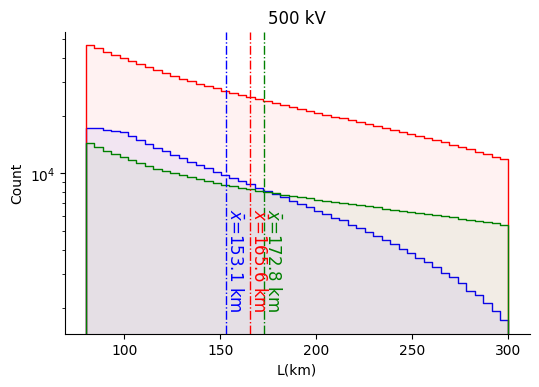

In [581]:
## L
bins = [50, 50, 50]
fig, ax = plt.subplots(dpi=dpi)
#al = .2
log_scale4 = log_scale3
stat4 = stat1

for aux, dts in enumerate([dt1, dt2, dt3]):
    sb.histplot(dts, x="L(km)",bins = bins[aux], ax = ax, stat = stat2, fill = fill, element = element, alpha = al, color = color[aux], log_scale = log_scale)
    ax.axvline(x = dts['L(km)'].mean(), color = color[aux], linestyle = '-.', alpha = 1, linewidth = 1)
    ax.text(dts['L(km)'].mean()+0.001, .2e4, '$\\bar{x}$=%.1f km'%(dts['L(km)'].mean()),color = color[aux], rotation = -90, size = 'large')

'''
sb.histplot(list_dt[0], x="L(km)", bins = 50, ax = ax, element = element, fill = fill, stat = stat4, alpha = al, color = 'blue', log_scale = log_scale4)
sb.histplot(dt1, x="L(km)", bins = 50, ax = ax, element = element, stat = stat4, fill = fill, alpha = al, color = 'red', log_scale = log_scale4)

ax.axvline(x = dt['L(km)'].mean(), color = 'b', linestyle = '-.', alpha = 1, linewidth = 1)
ax.axvline(x = dt1['L(km)'].mean(), color = 'r', linestyle = '-.', alpha = 1, linewidth = 1)
ax.text(dt['L(km)'].mean()+0.001, 3, '$\\bar{x}$=%.1f km'%(dt['L(km)'].mean()),color = 'b', rotation = -90, size = 'large')
ax.text(dt1['L(km)'].mean()+0.001,5, '$\\bar{x}$=%.1f km'%(dt1['L(km)'].mean()),color = 'r', rotation = -90, size = 'large')
'''
sb.despine()
plt.title(list_name[idx])

print([dt['L(km)'].mean(),dt['L(km)'].std()])
print([dt1['L(km)'].mean(),dt1['L(km)'].std()])


[0.9794013068644394, 0.022962277302766947]
[0.9655735111025665, 0.029948265123712667]


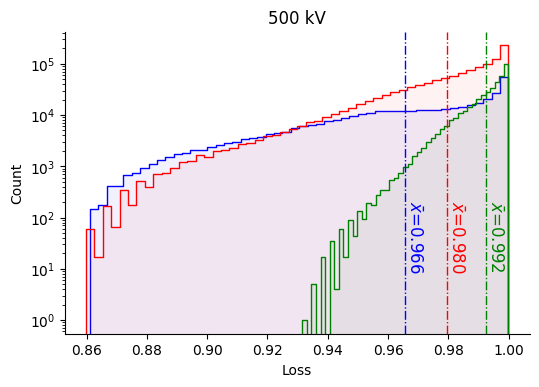

In [582]:
# Loss

bins = [50, 50, 45]

fig, ax = plt.subplots(dpi = dpi)
#al = .2
log_scale5 = log_scale4
stat5 = stat1
plt.title(list_name[idx])

for aux, dts in enumerate([dt1, dt2, dt3]):
    sb.histplot(dts, x="Loss",bins = bins[aux], ax = ax, stat = stat2, fill = fill, element = element, alpha = al, color = color[aux], log_scale = log_scale)
    ax.axvline(x = dts['Loss'].mean(), color = color[aux], linestyle = '-.', alpha = 1, linewidth = 1)
    ax.text(dts['Loss'].mean()+1e-4, 1e1, '$\\bar{x}$=%.3f'%(dts['Loss'].mean()),color = color[aux], rotation = -90, size = 'large')

#sb.histplot(list_dt[0], x="Loss", bins = 50, ax = ax, element = element, fill = fill, stat = stat5, alpha = al, color = 'blue', log_scale = log_scale5)
#sb.histplot(dt1, x="Loss", bins = 50, ax = ax, element = element,  stat = stat5, fill = fill, alpha = al, color = 'red', log_scale = log_scale5)
sb.despine()

print([dt['Loss'].mean(),dt['Loss'].std()])
print([dt1['Loss'].mean(),dt1['Loss'].std()])